<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Machine Learning in Agriculture</h1>
</div>

#### Author:- Aniket B. Barphe
#### LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
#### Platform:- Analytics Vidhya
#### Problem Statement:- Predict the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by                                                pesticides or damaged by other reasons.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [146]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier

# Model Evaluations
import sklearn as sk
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

CatBoost version 1.0.6
NumPy version 1.19.2
Pandas version 1.1.3
seaborn version 0.11.0
sklearn version 0.23.2
xgboost version 1.6.1
lightgbm version 3.3.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [147]:
train = pd.read_csv('C:/Users/PC/Pictures/AV/MachineLearninginAgriculture/train_yaOffsB.csv')
test = pd.read_csv('C:/Users/PC/Pictures/AV/MachineLearninginAgriculture/test_pFkWwen.csv')
submission = pd.read_csv('C:/Users/PC/Pictures/AV/MachineLearninginAgriculture/sample_submission_O1oDc4H.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [148]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None 

Shape of Train Data:-

(88858, 10) 

-------------------------------------------------------------------------------------------------------------

In [149]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)


About Train Data:-

          ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                       1                  0                0.0   
4                       1                  0                0.0   

   Number_Weeks_Quit  Season  Crop_Damage  
0                  0       1            0  
1                  0       2            1  
2                  0       2            1  
3                  0  

In [150]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
88853  F00155935                     3337          1          0   
88854  F00155938                     3516          1          0   
88855  F00155939                     3516          1          0   
88856  F00155942                     3702          1          0   
88857  F00155945                     3895          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
88853                       2                 10               12.0   
88854                       2                 10               20.0   
88855                       2                 15               40.0   
88856                       2                 10               25.0   
88857                       2                 20               37.0   

       Number_Weeks_Quit  Season  Crop_Damage  
88853                 44       3            0  
88854                 38       1            0  
88855 

In [151]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
unique,88858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00136392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,NaN,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


In [152]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
unique,59310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00108610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,NaN,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000


In [153]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
ID,0,0.00000
Estimated_Insects_Count,0,0.00000
Crop_Type,0,0.00000
Soil_Type,0,0.00000
Pesticide_Use_Category,0,0.00000
Number_Doses_Week,0,0.00000
Number_Weeks_Used,9000,10.12852
Number_Weeks_Quit,0,0.00000
Season,0,0.00000
Crop_Damage,0,0.00000


In [154]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
ID,0,0.00000
Estimated_Insects_Count,0,0.00000
Crop_Type,0,0.00000
Soil_Type,0,0.00000
Pesticide_Use_Category,0,0.00000
Number_Doses_Week,0,0.00000
Number_Weeks_Used,5893,9.93593
Number_Weeks_Quit,0,0.00000
Season,0,0.00000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Visualization of Train DataSet</h2>
</div>

- Understand more about "Train" Data


<AxesSubplot:ylabel='Crop_Damage'>

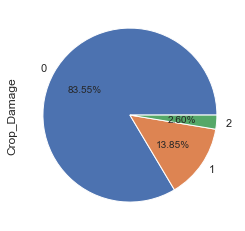

In [155]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
train.Crop_Damage.value_counts().plot.pie(autopct="%0.2f%%")
# Inference:- This is a highly imbalanced dataset with 83% of one class and very less presence of other classes

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>],
       [<AxesSubplot:title={'center':'Pesticide_Use_Category'}>,
        <AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>],
       [<AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'Crop_Damage'}>]], dtype=object)

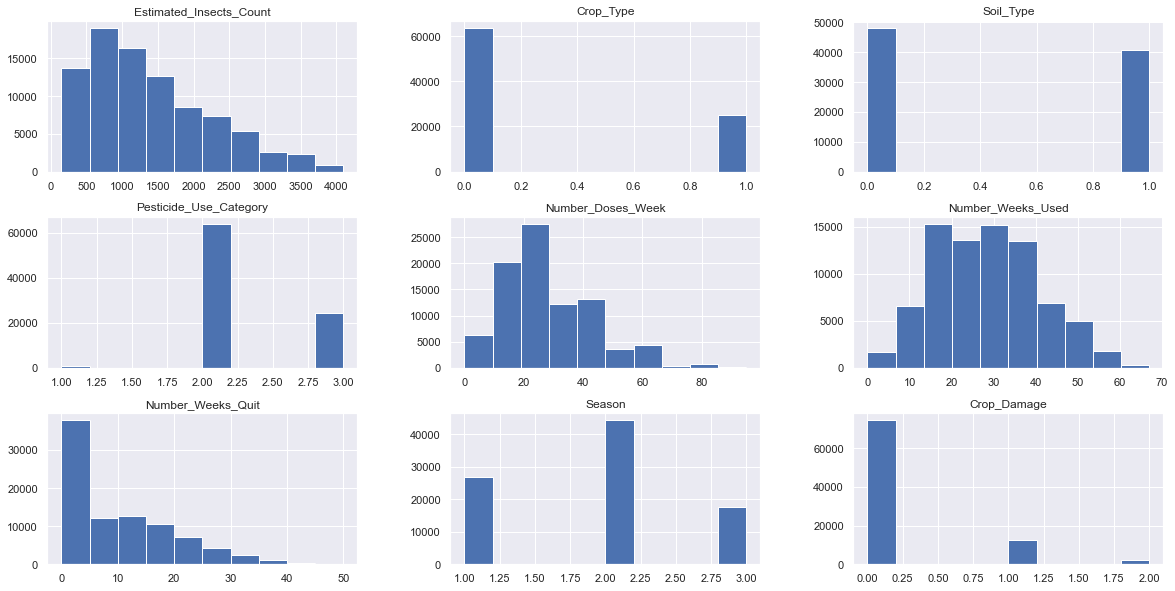

In [156]:
# Histogram to check for Data Distribution
train.hist(figsize=(20,10))

<AxesSubplot:title={'center':'Crop Damaged'}>

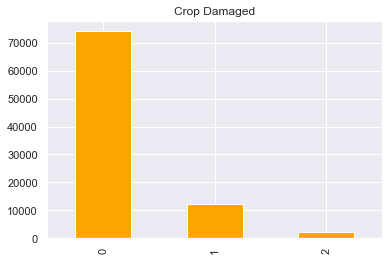

In [157]:
# value count for the target variable.
train.Crop_Damage.value_counts().plot(kind='bar',title='Crop Damaged',color=['orange'])

<AxesSubplot:title={'center':'Crop_Type Vs Crop_Damage'}, xlabel='Crop_Damage', ylabel='count'>

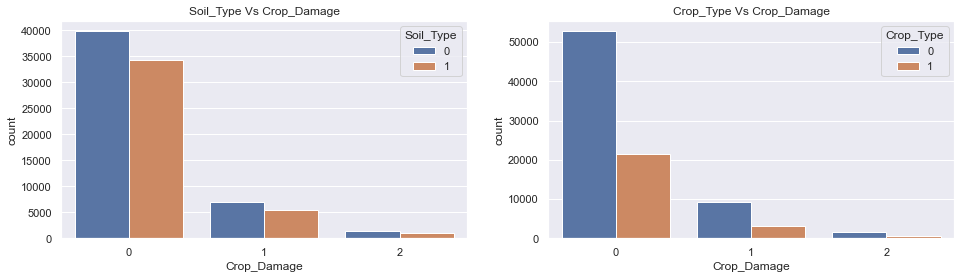

In [158]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Soil_Type Vs Crop_Damage')
sns.countplot(x='Crop_Damage',data=train,hue='Soil_Type')
plt.subplot(122)
plt.title('Crop_Type Vs Crop_Damage')
sns.countplot(x='Crop_Damage',data=train,hue='Crop_Type')
# Inference1:- Feature "Crop_Type" might be important while predicting the "Crop_Damage"
# Inference2:- Whereas Feature "Soil_Type" is not showing variation W.r.t "Crop_Damage"

<AxesSubplot:title={'center':'Pesticide Vs Crop_Damage'}, xlabel='Crop_Damage', ylabel='count'>

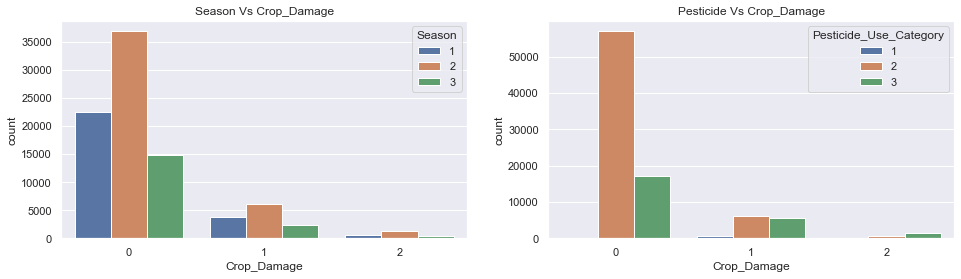

In [159]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Season Vs Crop_Damage')
sns.countplot(x='Crop_Damage',data=train,hue='Season')
plt.subplot(122)
plt.title('Pesticide Vs Crop_Damage')
sns.countplot(x='Crop_Damage',data=train,hue='Pesticide_Use_Category')
# Inference:- Feature "Season" & "Pesticides" also may be contibute to predict the "Crop_Damage"

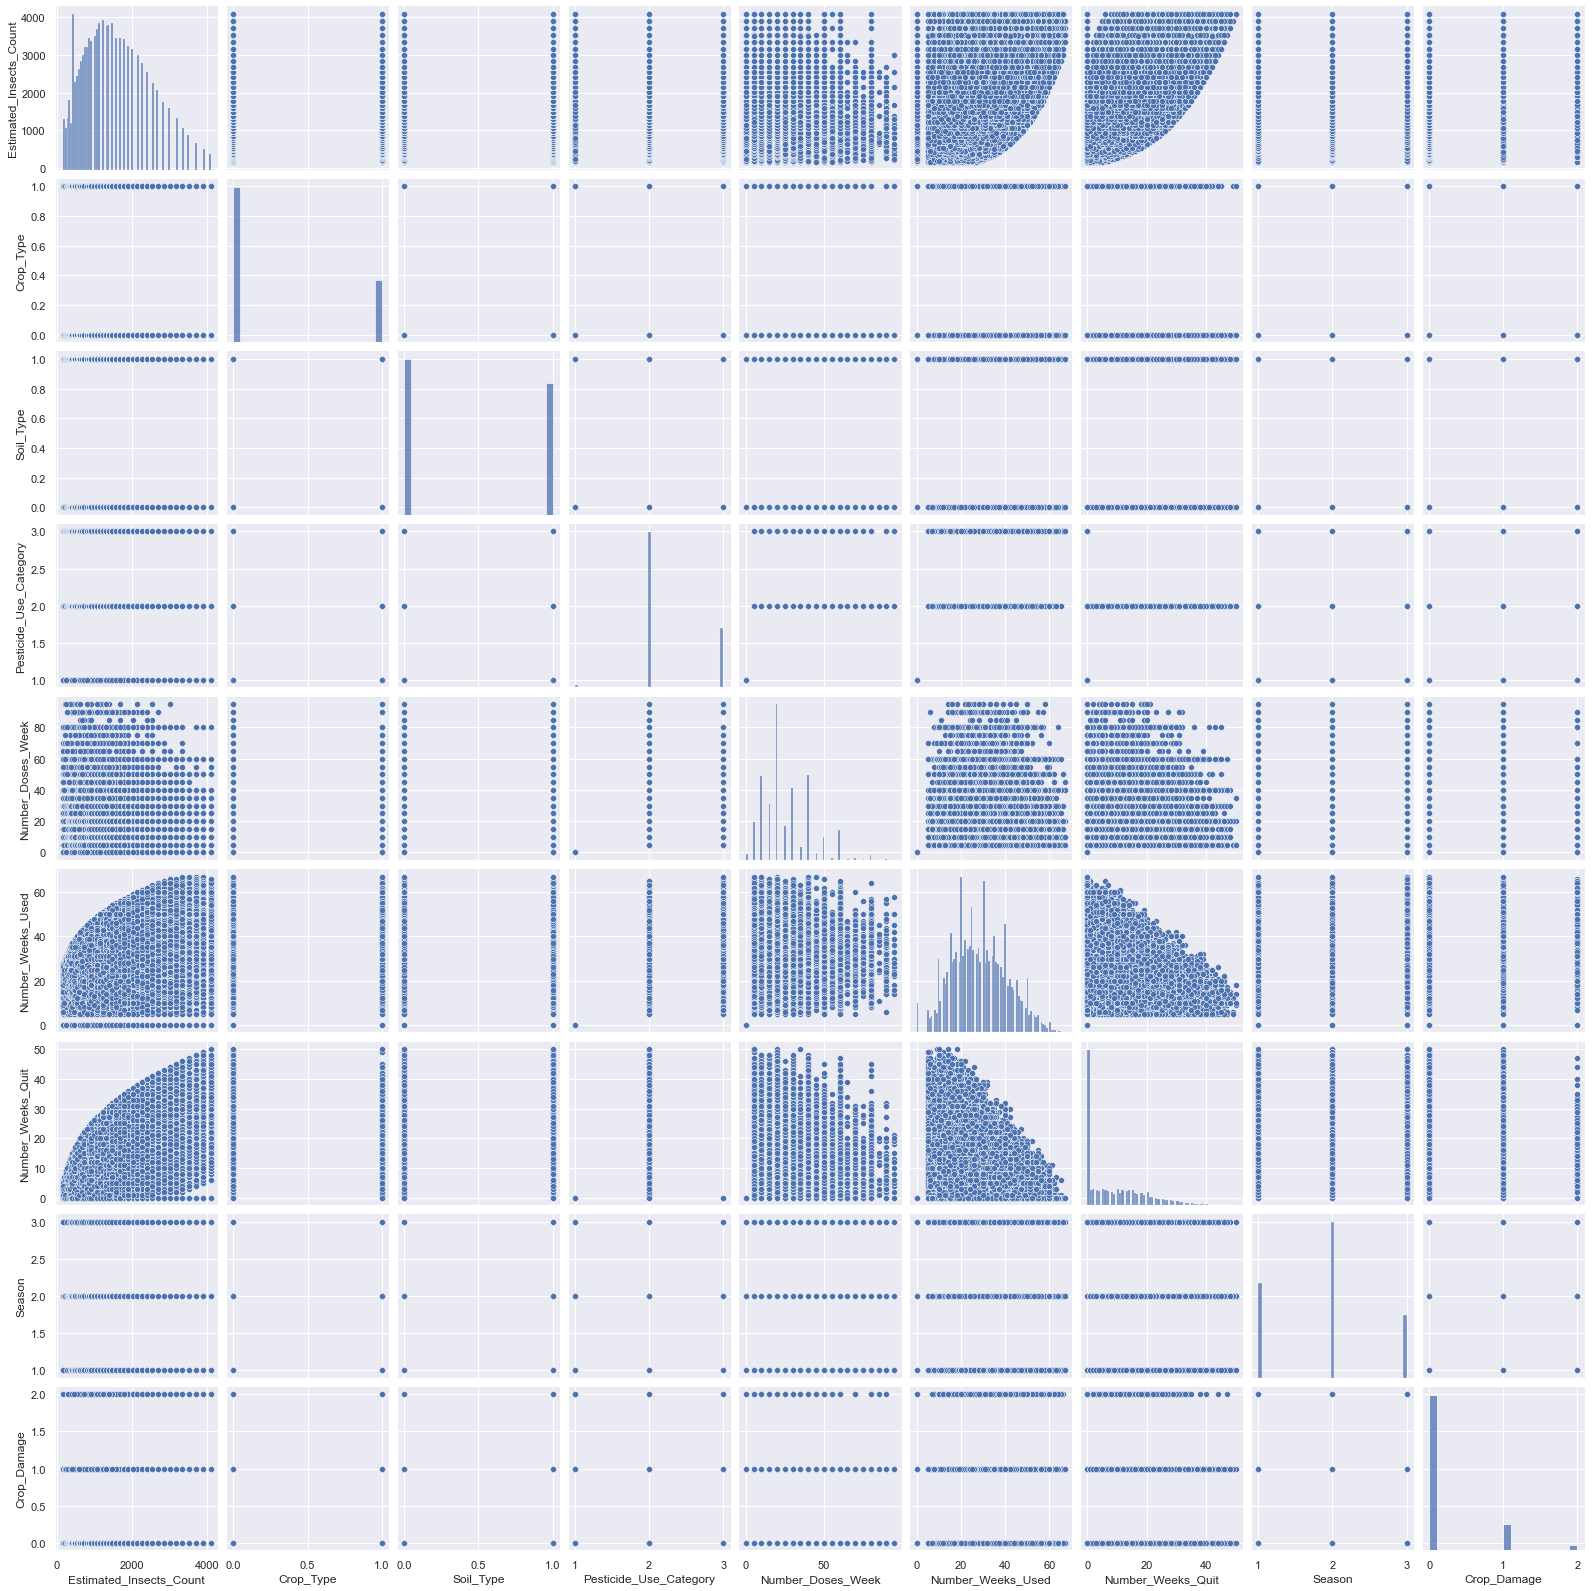

In [160]:
sns.pairplot(train)

<AxesSubplot:>

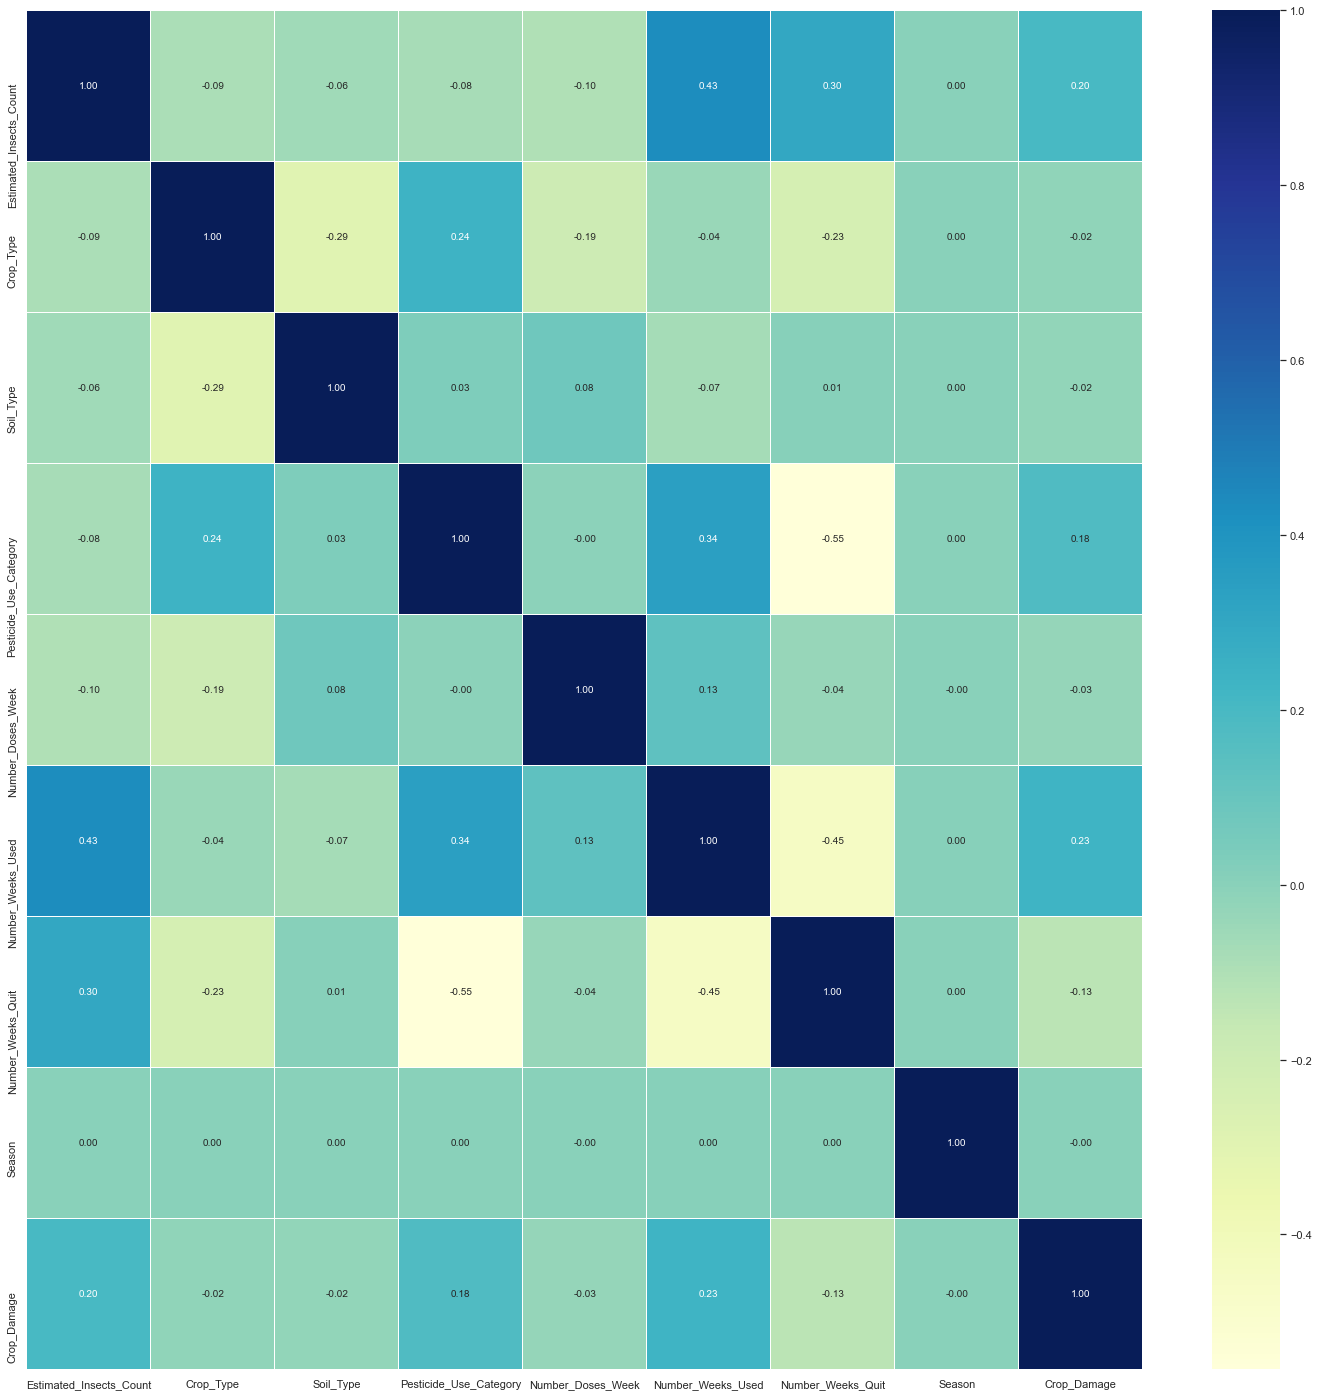

In [161]:
fig , ax = plt.subplots(figsize=(25,25))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

<AxesSubplot:xlabel='Season'>

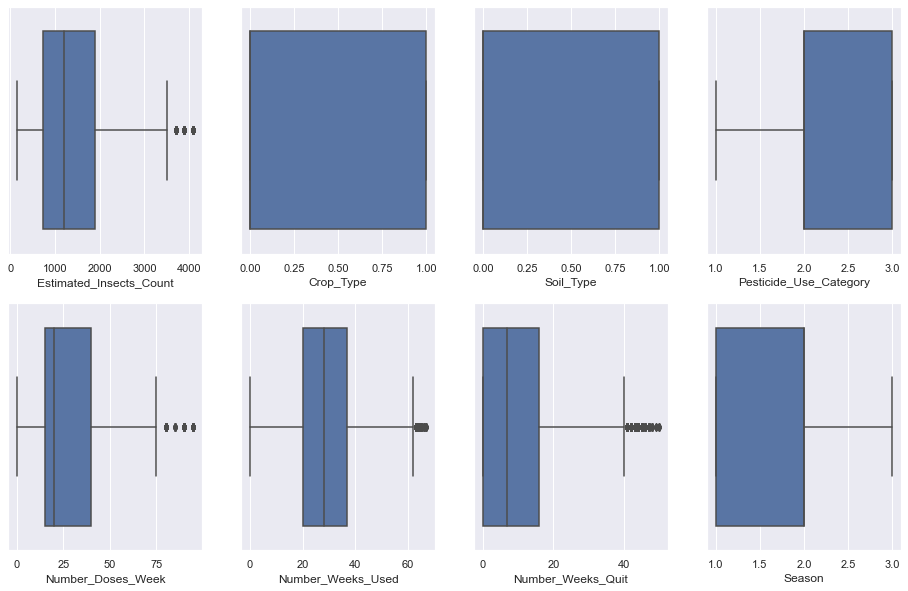

In [162]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.boxplot('Estimated_Insects_Count',data=train,ax=ax[0][0])
sns.boxplot('Crop_Type',data=train,ax=ax[0][1])
sns.boxplot('Soil_Type',data=train,ax=ax[0][2])
sns.boxplot('Pesticide_Use_Category',data=train,ax=ax[0][3])
sns.boxplot('Number_Doses_Week',data=train,ax=ax[1][0])
sns.boxplot('Number_Weeks_Used',data=train,ax=ax[1][1])
sns.boxplot('Number_Weeks_Quit',data=train,ax=ax[1][2])
sns.boxplot('Season',data=train,ax=ax[1][3])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [163]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Train DataSet</h2>
</div>


#### * Imputation of "Number_Weeks_Used" Variable

In [164]:
print("=========================Imputation of Number_Weeks_Used========================================================")
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(),axis=0)
print("******************************* Imputation of Number_Weeks_Used Variable Completed***************************")
print('-------------'*9)


=========================Imputation of Number_Weeks_Used========================================================
******************************* Imputation of Number_Weeks_Used Variable Completed***************************
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>

In [165]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Test DataSet</h2>
</div>


#### * Imputation of "Number_Weeks_Used" Variable

In [166]:
print("=========================Imputation of Number_Weeks_Used========================================================")
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(),axis=0)
print("******************************* Imputation of Number_Weeks_Used Variable Completed***************************")
print('-------------'*9)


=========================Imputation of Number_Weeks_Used========================================================
******************************* Imputation of Number_Weeks_Used Variable Completed***************************
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [167]:
train = train.drop(['ID'],axis=1)
print(train.head())
print('-------------'*9)
test = test.drop(['ID'],axis=1)
print(test.head())
print('-------------'*9)

   Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      188          1          0                       1   
1                      209          1          0                       1   
2                      257          1          0                       1   
3                      257          1          1                       1   
4                      342          1          0                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                  0                0.0                  0       1   
1                  0                0.0                  0       2   
2                  0                0.0                  0       2   
3                  0                0.0                  0       2   
4                  0                0.0                  0       2   

   Crop_Damage  
0            0  
1            1  
2            1  
3            1  
4            1  
--------------------

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Check Datatypes in Train and Test DataSet</h2>
</div>


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  59310 non-null  int64  
 1   Crop_Type                59310 non-null  int64  
 2   Soil_Type                59310 non-null  int64  
 3   Pesticide_Use_Category   59310 non-null  int64  
 4   Number_Doses_Week        59310 non-null  int64  
 5   Number_Weeks_Used        59310 non-null  float64
 6   Number_Weeks_Quit        59310 non-null  int64  
 7   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.6 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [204]:
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='Crop_Damage'

features.remove(label)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nFEATURES ARE:-",features)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nLABELS ARE:-",label)

print("--------------------------------------------------------------------------------------------------------\n\n")

X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 88858 
Length of Train Data:- 88849 
Length of Test Data:- 9
--------------------------------------------------------------------------------------------------------



FEATURES ARE:- ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']
--------------------------------------------------------------------------------------------------------



LABELS ARE:- Crop_Damage
--------------------------------------------------------------------------------------------------------




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

In [210]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')

Accuracy of Logistic Regression on training set: 0.84
Accuracy of Logistic Regression on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



#### * Hyper Parameter Tuning for Logistic Regression

In [173]:
solvers = ['newton-cg', 'sag', 'lbfgs']
penalty = ['l2']
C = [0.01, 0.1, 1.0, 10, 100]
param = dict(solver=solvers, penalty=penalty, C=C)
random_search = RandomizedSearchCV(estimator=model1, param_distributions=param, cv=5, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",random_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.8350572388166743


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [220]:
model2 = LogisticRegression(solver='lbfgs', penalty='l2',C=0.01,random_state=42)
model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')

Accuracy of Logistic Regression on training set: 0.83
Accuracy of Logistic Regression on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Classifier</h2>
</div>

In [230]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.98
Accuracy of Random Forest Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



#### * Hyper Parameter Tuning for Random Forest Classifier

In [176]:
n_estimators = [10, 50, 100, 200]
max_depth = [4, 6, 8, 10]
max_features =  ['sqrt', 'auto', 'log2']
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [3, 5, 10] 
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features
            , min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf
            , bootstrap=bootstrap)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model3, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
random_result = random_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",random_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",random_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.8436110755682087


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [240]:
model4 = RandomForestClassifier(n_estimators=10, min_samples_split=2, min_samples_leaf=3
                                , max_features='log2', max_depth=10, bootstrap=True, random_state=0)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.85
Accuracy of Random Forest Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- LGBM Classifier</h2>
</div>

In [250]:
model5 = LGBMClassifier(random_state=0)
model5.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model5.predict(X_test)),'\n')

Accuracy of LGBM Classifier on training set: 0.85
Accuracy of LGBM Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



#### * Hyper Parameter Tuning for LGBM Classifier

In [179]:
boosting_type = ['gbdt','dart','goss']
num_leaves = [10, 20, 30, 40, 50]
max_depth = [-1, 5, 10, 15, 20]
learning_rate = [0.03, 0.07, 0.3]
n_estimators = [100, 200, 300, 400, 500]
min_child_samples = [20, 40]
colsample_bytree = [0.5, 1]
reg_alpha = [2]
reg_lambda = [2]
param = dict(boosting_type=boosting_type, num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate,
            n_estimators=n_estimators, min_child_samples=min_child_samples, colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
lgbm_search = RandomizedSearchCV(estimator=model5, param_distributions=param, n_jobs=-1, cv=cv, scoring='accuracy')
lgbm_result = lgbm_search.fit(X_train,y_train)
print('-------------'*9)
print("Best Parameters after Random Search:- \n",lgbm_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",lgbm_result.best_score_)

---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'reg_alpha': 2, 'num_leaves': 50, 'n_estimators': 300, 'min_child_samples': 40, 'max_depth': -1, 'learning_rate': 0.03, 'colsample_bytree': 1, 'boosting_type': 'gbdt'}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.8475203149858478


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [260]:
model6 = LGBMClassifier(reg_alpha=2,num_leaves=50, n_estimators=300
                        , min_child_samples=40, max_depth=-1
                        , learning_rate=0.03, colsample_bytree=1, boosting_type='gbdt', random_state=42)
model6.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model6.predict(X_test)),'\n')

Accuracy of LGBM Classifier on training set: 0.85
Accuracy of LGBM Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- CatBoost Classifier</h2>
</div>

In [266]:
model7 = CatBoostClassifier(random_state=0)
model7.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model7.predict(X_test)),'\n')

Learning rate set to 0.099473
0:	learn: 0.9801743	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.8906063	total: 119ms	remaining: 59.5s
2:	learn: 0.8202004	total: 152ms	remaining: 50.6s
3:	learn: 0.7629687	total: 191ms	remaining: 47.6s
4:	learn: 0.7165633	total: 239ms	remaining: 47.6s
5:	learn: 0.6778627	total: 275ms	remaining: 45.6s
6:	learn: 0.6448287	total: 312ms	remaining: 44.3s
7:	learn: 0.6173480	total: 349ms	remaining: 43.3s
8:	learn: 0.5935325	total: 384ms	remaining: 42.3s
9:	learn: 0.5731156	total: 431ms	remaining: 42.6s
10:	learn: 0.5561547	total: 471ms	remaining: 42.4s
11:	learn: 0.5407711	total: 508ms	remaining: 41.8s
12:	learn: 0.5271820	total: 543ms	remaining: 41.2s
13:	learn: 0.5150870	total: 580ms	remaining: 40.9s
14:	learn: 0.5049304	total: 633ms	remaining: 41.6s
15:	learn: 0.4961926	total: 671ms	remaining: 41.2s
16:	learn: 0.4885019	total: 706ms	remaining: 40.8s
17:	learn: 0.4820978	total: 741ms	remaining: 40.4s
18:	learn: 0.4759264	total: 776ms	remaining: 40.1s
19:	learn

164:	learn: 0.4148046	total: 6.97s	remaining: 35.3s
165:	learn: 0.4147724	total: 7.02s	remaining: 35.3s
166:	learn: 0.4146835	total: 7.06s	remaining: 35.2s
167:	learn: 0.4146080	total: 7.1s	remaining: 35.2s
168:	learn: 0.4145748	total: 7.14s	remaining: 35.1s
169:	learn: 0.4145495	total: 7.21s	remaining: 35.2s
170:	learn: 0.4145151	total: 7.28s	remaining: 35.3s
171:	learn: 0.4143750	total: 7.36s	remaining: 35.4s
172:	learn: 0.4143257	total: 7.43s	remaining: 35.5s
173:	learn: 0.4142596	total: 7.48s	remaining: 35.5s
174:	learn: 0.4142355	total: 7.51s	remaining: 35.4s
175:	learn: 0.4141959	total: 7.55s	remaining: 35.4s
176:	learn: 0.4141522	total: 7.6s	remaining: 35.3s
177:	learn: 0.4141052	total: 7.63s	remaining: 35.2s
178:	learn: 0.4140393	total: 7.67s	remaining: 35.2s
179:	learn: 0.4139885	total: 7.71s	remaining: 35.1s
180:	learn: 0.4139053	total: 7.75s	remaining: 35.1s
181:	learn: 0.4137970	total: 7.8s	remaining: 35.1s
182:	learn: 0.4137475	total: 7.84s	remaining: 35s
183:	learn: 0.413

326:	learn: 0.4077999	total: 13.5s	remaining: 27.8s
327:	learn: 0.4077617	total: 13.6s	remaining: 27.8s
328:	learn: 0.4077434	total: 13.6s	remaining: 27.8s
329:	learn: 0.4076978	total: 13.7s	remaining: 27.7s
330:	learn: 0.4076803	total: 13.7s	remaining: 27.7s
331:	learn: 0.4076511	total: 13.8s	remaining: 27.7s
332:	learn: 0.4076139	total: 13.8s	remaining: 27.7s
333:	learn: 0.4075885	total: 13.9s	remaining: 27.7s
334:	learn: 0.4075704	total: 13.9s	remaining: 27.6s
335:	learn: 0.4075485	total: 14s	remaining: 27.6s
336:	learn: 0.4074854	total: 14s	remaining: 27.6s
337:	learn: 0.4074673	total: 14.1s	remaining: 27.6s
338:	learn: 0.4074234	total: 14.1s	remaining: 27.5s
339:	learn: 0.4073934	total: 14.2s	remaining: 27.5s
340:	learn: 0.4073727	total: 14.2s	remaining: 27.5s
341:	learn: 0.4073425	total: 14.2s	remaining: 27.4s
342:	learn: 0.4073098	total: 14.3s	remaining: 27.4s
343:	learn: 0.4072944	total: 14.3s	remaining: 27.3s
344:	learn: 0.4072817	total: 14.4s	remaining: 27.3s
345:	learn: 0.40

489:	learn: 0.4028930	total: 21s	remaining: 21.9s
490:	learn: 0.4028259	total: 21.1s	remaining: 21.8s
491:	learn: 0.4027800	total: 21.1s	remaining: 21.8s
492:	learn: 0.4027595	total: 21.1s	remaining: 21.7s
493:	learn: 0.4027154	total: 21.2s	remaining: 21.7s
494:	learn: 0.4027057	total: 21.2s	remaining: 21.6s
495:	learn: 0.4026852	total: 21.3s	remaining: 21.6s
496:	learn: 0.4026267	total: 21.3s	remaining: 21.5s
497:	learn: 0.4026085	total: 21.3s	remaining: 21.5s
498:	learn: 0.4025795	total: 21.4s	remaining: 21.4s
499:	learn: 0.4025601	total: 21.4s	remaining: 21.4s
500:	learn: 0.4025437	total: 21.4s	remaining: 21.4s
501:	learn: 0.4025250	total: 21.5s	remaining: 21.3s
502:	learn: 0.4025113	total: 21.5s	remaining: 21.2s
503:	learn: 0.4024827	total: 21.5s	remaining: 21.2s
504:	learn: 0.4024537	total: 21.6s	remaining: 21.1s
505:	learn: 0.4024152	total: 21.6s	remaining: 21.1s
506:	learn: 0.4023676	total: 21.7s	remaining: 21.1s
507:	learn: 0.4023384	total: 21.7s	remaining: 21s
508:	learn: 0.40

650:	learn: 0.3990048	total: 27.3s	remaining: 14.6s
651:	learn: 0.3989867	total: 27.3s	remaining: 14.6s
652:	learn: 0.3989499	total: 27.4s	remaining: 14.6s
653:	learn: 0.3989414	total: 27.4s	remaining: 14.5s
654:	learn: 0.3989200	total: 27.5s	remaining: 14.5s
655:	learn: 0.3989024	total: 27.5s	remaining: 14.4s
656:	learn: 0.3988841	total: 27.5s	remaining: 14.4s
657:	learn: 0.3988574	total: 27.6s	remaining: 14.3s
658:	learn: 0.3988327	total: 27.6s	remaining: 14.3s
659:	learn: 0.3988239	total: 27.6s	remaining: 14.2s
660:	learn: 0.3988104	total: 27.7s	remaining: 14.2s
661:	learn: 0.3987901	total: 27.7s	remaining: 14.2s
662:	learn: 0.3987732	total: 27.8s	remaining: 14.1s
663:	learn: 0.3987224	total: 27.8s	remaining: 14.1s
664:	learn: 0.3986937	total: 27.8s	remaining: 14s
665:	learn: 0.3986842	total: 27.9s	remaining: 14s
666:	learn: 0.3986577	total: 27.9s	remaining: 13.9s
667:	learn: 0.3986310	total: 27.9s	remaining: 13.9s
668:	learn: 0.3985839	total: 28s	remaining: 13.8s
669:	learn: 0.3985

814:	learn: 0.3955607	total: 33.5s	remaining: 7.6s
815:	learn: 0.3955454	total: 33.5s	remaining: 7.56s
816:	learn: 0.3955193	total: 33.6s	remaining: 7.52s
817:	learn: 0.3954732	total: 33.6s	remaining: 7.48s
818:	learn: 0.3954405	total: 33.7s	remaining: 7.44s
819:	learn: 0.3954044	total: 33.7s	remaining: 7.4s
820:	learn: 0.3953707	total: 33.8s	remaining: 7.36s
821:	learn: 0.3953428	total: 33.8s	remaining: 7.32s
822:	learn: 0.3953270	total: 33.8s	remaining: 7.27s
823:	learn: 0.3952979	total: 33.9s	remaining: 7.23s
824:	learn: 0.3952789	total: 33.9s	remaining: 7.19s
825:	learn: 0.3952647	total: 33.9s	remaining: 7.15s
826:	learn: 0.3952515	total: 34s	remaining: 7.11s
827:	learn: 0.3952374	total: 34s	remaining: 7.06s
828:	learn: 0.3952191	total: 34s	remaining: 7.02s
829:	learn: 0.3951633	total: 34.1s	remaining: 6.98s
830:	learn: 0.3951313	total: 34.1s	remaining: 6.94s
831:	learn: 0.3950975	total: 34.2s	remaining: 6.9s
832:	learn: 0.3950764	total: 34.2s	remaining: 6.86s
833:	learn: 0.3950499

978:	learn: 0.3921766	total: 39.8s	remaining: 854ms
979:	learn: 0.3921555	total: 39.9s	remaining: 814ms
980:	learn: 0.3921283	total: 39.9s	remaining: 773ms
981:	learn: 0.3921027	total: 40s	remaining: 732ms
982:	learn: 0.3920900	total: 40s	remaining: 692ms
983:	learn: 0.3920684	total: 40s	remaining: 651ms
984:	learn: 0.3920581	total: 40.1s	remaining: 610ms
985:	learn: 0.3920375	total: 40.1s	remaining: 569ms
986:	learn: 0.3920247	total: 40.1s	remaining: 529ms
987:	learn: 0.3920124	total: 40.2s	remaining: 488ms
988:	learn: 0.3919925	total: 40.2s	remaining: 447ms
989:	learn: 0.3919705	total: 40.2s	remaining: 407ms
990:	learn: 0.3919641	total: 40.3s	remaining: 366ms
991:	learn: 0.3919221	total: 40.3s	remaining: 325ms
992:	learn: 0.3919032	total: 40.4s	remaining: 284ms
993:	learn: 0.3918656	total: 40.4s	remaining: 244ms
994:	learn: 0.3918326	total: 40.4s	remaining: 203ms
995:	learn: 0.3918063	total: 40.5s	remaining: 163ms
996:	learn: 0.3918041	total: 40.5s	remaining: 122ms
997:	learn: 0.3917

#### * Hyper Parameter Tuning for CatBoost Classifier

In [182]:
parameters = {'depth': [4,5,6,7,8,9, 10]
              ,'learning_rate' : [0.01,0.02,0.03,0.04]
              ,'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
             }
Grid_m7 = GridSearchCV(estimator=model7, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_m7.fit(X_train, y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_m7.best_estimator_)
print('-------------'*9)
print("\n The best score across ALL searched params:\n",Grid_m7.best_score_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",Grid_m7.best_params_)

0:	learn: 1.0498429	total: 5s	remaining: 8m 15s
1:	learn: 1.0057394	total: 5.38s	remaining: 4m 23s
2:	learn: 0.9662824	total: 5.95s	remaining: 3m 12s
3:	learn: 0.9301593	total: 6.22s	remaining: 2m 29s
4:	learn: 0.8975084	total: 6.34s	remaining: 2m
5:	learn: 0.8672577	total: 6.44s	remaining: 1m 40s
6:	learn: 0.8396813	total: 6.49s	remaining: 1m 26s
7:	learn: 0.8145762	total: 6.55s	remaining: 1m 15s
8:	learn: 0.7910839	total: 6.6s	remaining: 1m 6s
9:	learn: 0.7695458	total: 6.65s	remaining: 59.9s
10:	learn: 0.7494955	total: 6.82s	remaining: 55.2s
11:	learn: 0.7311894	total: 6.86s	remaining: 50.3s
12:	learn: 0.7138118	total: 6.92s	remaining: 46.3s
13:	learn: 0.6975754	total: 7.12s	remaining: 43.7s
14:	learn: 0.6822992	total: 7.32s	remaining: 41.5s
15:	learn: 0.6680922	total: 7.44s	remaining: 39.1s
16:	learn: 0.6547636	total: 7.55s	remaining: 36.9s
17:	learn: 0.6425114	total: 7.6s	remaining: 34.6s
18:	learn: 0.6310733	total: 7.64s	remaining: 32.6s
19:	learn: 0.6201352	total: 7.85s	remainin

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Fitting CatBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [275]:
model8 = CatBoostClassifier(depth = 10, iterations = 100, learning_rate = 0.04,random_state=42)
model8.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model8.predict(X_test)),'\n')

0:	learn: 1.0498429	total: 103ms	remaining: 10.2s
1:	learn: 1.0057394	total: 201ms	remaining: 9.85s
2:	learn: 0.9662824	total: 240ms	remaining: 7.75s
3:	learn: 0.9301593	total: 346ms	remaining: 8.31s
4:	learn: 0.8975084	total: 445ms	remaining: 8.46s
5:	learn: 0.8672577	total: 532ms	remaining: 8.34s
6:	learn: 0.8396813	total: 597ms	remaining: 7.93s
7:	learn: 0.8145762	total: 645ms	remaining: 7.42s
8:	learn: 0.7910839	total: 694ms	remaining: 7.02s
9:	learn: 0.7695458	total: 743ms	remaining: 6.69s
10:	learn: 0.7494955	total: 870ms	remaining: 7.04s
11:	learn: 0.7311894	total: 909ms	remaining: 6.66s
12:	learn: 0.7138118	total: 1s	remaining: 6.69s
13:	learn: 0.6975754	total: 1.07s	remaining: 6.57s
14:	learn: 0.6822992	total: 1.18s	remaining: 6.7s
15:	learn: 0.6680922	total: 1.3s	remaining: 6.84s
16:	learn: 0.6547636	total: 1.4s	remaining: 6.83s
17:	learn: 0.6425114	total: 1.45s	remaining: 6.59s
18:	learn: 0.6310733	total: 1.49s	remaining: 6.37s
19:	learn: 0.6201352	total: 1.57s	remaining: 6.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- KNeighbors Classifier</h2>
</div>

In [280]:
model9 = KNeighborsClassifier(n_jobs= -1)
model9.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model9.predict(X_test)),'\n')

Accuracy of KNeighbors Classifier on training set: 0.86
Accuracy of KNeighbors Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



#### * Hyper Parameter Tuning for KNeighbors Classifier

In [197]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model = GridSearchCV(model9, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print('-------------'*9)
print(" Results from Grid Search " )
print("Best Hyper Parameters:\n",model.best_params_)
print('-------------'*9)
print("\n The best score across ALL searched params:\n",model.best_score_)
print('-------------'*9)
print("\n The best parameters across ALL searched params:\n",model.best_params_)

---------------------------------------------------------------------------------------------------------------------
 Results from Grid Search 
Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

 The best score across ALL searched params:
 0.8348208892124731
---------------------------------------------------------------------------------------------------------------------

 The best parameters across ALL searched params:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting KNeighbors Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [282]:
model10 = KNeighborsClassifier(algorithm = 'brute', leaf_size =  1, n_jobs =  -1
                               , n_neighbors = 10, weights = 'uniform')
model10.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model10.predict(X_test)),'\n')

Accuracy of KNeighbors Classifier on training set: 0.85
Accuracy of KNeighbors Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- XGB Classifier</h2>
</div>

In [286]:
model11 = XGBClassifier(random_state=0)

model11.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model11.predict(X_test)),'\n')

Accuracy of XGB Classifier on training set: 0.86
Accuracy of XGB Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



#### * Hyper Parameter Tuning for XGB Classifier

In [200]:
params = {'max_depth': [3, 6, 10, 15],'min_child_weight' : [ 1, 3, 5, 7 ],'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf_search = RandomizedSearchCV(estimator=xgbclf,param_distributions=params,scoring='accuracy'
                         ,n_iter=25,n_jobs=4,verbose=1)
clf_result = clf_search.fit(X_train,y_train)
print('-------------'*9)
#print("Best hyperparameter combination: ", best_combination)
print("Best Parameters after Random Search:- \n",clf_result.best_params_)
print('-------------'*9)
print("Best Score:- \n",clf_result.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed: 25.3min finished


---------------------------------------------------------------------------------------------------------------------
Best Parameters after Random Search:- 
 {'subsample': 0.6, 'num_class': 10, 'n_estimators': 750, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
---------------------------------------------------------------------------------------------------------------------
Best Score:- 
 0.8466724325270661


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting XGB Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

In [297]:
model12 = XGBClassifier(subsample = 0.6, num_class = 10, n_estimators = 750
                        , max_depth = 3, learning_rate = 0.2, min_child_weight = 3
                        , colsample_bytree = 0.8999999999999999, colsample_bylevel = 0.7999999999999999
                       , random_state=42, gamma = 0.3)

model12.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model12.predict(X_test)),'\n')

Accuracy of XGB Classifier on training set: 0.85
Accuracy of XGB Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Linear Support Vector Classification</h2>
</div>

In [298]:
model13 = make_pipeline(StandardScaler(),LinearSVC())

model13.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model13.predict(X_test)),'\n')

Accuracy of Linear SVC on training set: 0.84
Accuracy of Linear SVC on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Stochastic Gradient Descent Classifier</h2>
</div>

In [303]:
model14 = make_pipeline(StandardScaler(),SGDClassifier())

model14.fit(X_train,y_train) 
print('Accuracy of SGD Classifier on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of SGD Classifier on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model14.predict(X_test)),'\n')

Accuracy of SGD Classifier on training set: 0.84
Accuracy of SGD Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Linear Support Vector Classification (Generate Probability Estimates)</h2>
</div>

In [330]:
mm = make_pipeline(StandardScaler(),LinearSVC())
model15 = CalibratedClassifierCV(mm)

model15.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model15.predict(X_test)),'\n')

Accuracy of Linear SVC on training set: 0.83
Accuracy of Linear SVC on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Stochastic Gradient Descent Classifier (Generate Probability Estimates)</h2>
</div>

In [326]:
ab = make_pipeline(StandardScaler(),SGDClassifier(loss = 'hinge'))
#model16 = CalibratedClassifierCV(ab, cv=5, method='sigmoid')
model16 = CalibratedClassifierCV(ab)

model16.fit(X_train,y_train) 
print('Accuracy of SGD Classifier on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of SGD Classifier on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model16.predict(X_test)),'\n')

Accuracy of SGD Classifier on training set: 0.84
Accuracy of SGD Classifier on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Ensemble Classifier</h2>
</div>

In [344]:
clf1 = model15
clf2 = model16

model17 = VotingClassifier(estimators=[('ExTrees', clf1), ('CatBoost', clf2)], voting='hard')
model17.fit(X_train, y_train)

print('Accuracy of Random Forest on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model17.predict(X_test)),'\n')

Accuracy of Random Forest on training set: 0.84
Accuracy of Random Forest on test set: 0.67
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [346]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 17
y_pred = model17.predict(x) 

print("Result of Model 17 were used for Submission")
print(y_pred)

Result of Model 17 were used for Submission
[0 0 0 ... 0 0 0]


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [347]:
df1=pd.DataFrame(y_pred,columns=['Crop_Damage'])

submission1 = submission.drop(['Crop_Damage'], axis=1)

final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv('C:/Users/PC/Pictures/AV/MachineLearninginAgriculture/Best_Model_By_Aniiket_Barphe.csv',index=False)

print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 
    
1) Public Leaderboard :- 0.834461917286922

2) Private Leaderboard :- 0.834511715450882

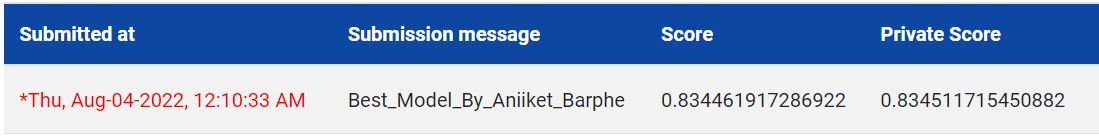

Competition Link: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-in-agriculture/